In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import pyodbc as odbc

In [3]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [4]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds', cnxn)
dataset.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335.0
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336.0
6,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336.0
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337.0
8,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337.0
9,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338.0


In [13]:
del dataset['x']
del dataset['y']
del dataset['z']
dataset.head(20)

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
5,0.24,Very Good,J,VVS2,62.8,57.0,336
6,0.24,Very Good,I,VVS1,62.3,57.0,336
7,0.26,Very Good,H,SI1,61.9,55.0,337
8,0.22,Fair,E,VS2,65.1,61.0,337
9,0.23,Very Good,H,VS1,59.4,61.0,338


In [14]:
cut_mapping = {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2, "Fair": 1}
dataset["cut_scale"] = dataset.cut.map(cut_mapping)
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,cut_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,5
1,0.21,Premium,E,SI1,59.8,61.0,326,4
2,0.23,Good,E,VS1,56.9,65.0,327,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4
4,0.31,Good,J,SI2,63.3,58.0,335,2
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3
7,0.26,Very Good,H,SI1,61.9,55.0,337,3
8,0.22,Fair,E,VS2,65.1,61.0,337,1
9,0.23,Very Good,H,VS1,59.4,61.0,338,3


In [15]:
color_mapping = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}
dataset["color_scale"] = dataset.color.map(color_mapping)
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,cut_scale,color_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,5,6
1,0.21,Premium,E,SI1,59.8,61.0,326,4,6
2,0.23,Good,E,VS1,56.9,65.0,327,2,6
3,0.29,Premium,I,VS2,62.4,58.0,334,4,2
4,0.31,Good,J,SI2,63.3,58.0,335,2,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3,2
7,0.26,Very Good,H,SI1,61.9,55.0,337,3,3
8,0.22,Fair,E,VS2,65.1,61.0,337,1,6
9,0.23,Very Good,H,VS1,59.4,61.0,338,3,3


In [16]:
clarity_mapping = {"FL":11, "IF": 10, "VVS1": 9, "VVS2": 8, "VS1": 7, "VS2": 6, "SI1": 5, "SI2": 4, "I1": 3, "I2": 2, "I3":1}
dataset["clarity_scale"] = dataset.clarity.map(clarity_mapping)
dataset.head(20)

,carat,cut,color,clarity,depth,table,price,cut_scale,color_scale,clarity_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,5,6,4
1,0.21,Premium,E,SI1,59.8,61.0,326,4,6,5
2,0.23,Good,E,VS1,56.9,65.0,327,2,6,7
3,0.29,Premium,I,VS2,62.4,58.0,334,4,2,6
4,0.31,Good,J,SI2,63.3,58.0,335,2,1,4
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3,1,8
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3,2,9
7,0.26,Very Good,H,SI1,61.9,55.0,337,3,3,5
8,0.22,Fair,E,VS2,65.1,61.0,337,1,6,6
9,0.23,Very Good,H,VS1,59.4,61.0,338,3,3,7


In [17]:
dataset["price_USD"] = dataset.price

In [18]:
del dataset['price']
dataset.head(20)

,carat,cut,color,clarity,depth,table,cut_scale,color_scale,clarity_scale,price_USD
0,0.23,Ideal,E,SI2,61.5,55.0,5,6,4,326
1,0.21,Premium,E,SI1,59.8,61.0,4,6,5,326
2,0.23,Good,E,VS1,56.9,65.0,2,6,7,327
3,0.29,Premium,I,VS2,62.4,58.0,4,2,6,334
4,0.31,Good,J,SI2,63.3,58.0,2,1,4,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3,1,8,336
6,0.24,Very Good,I,VVS1,62.3,57.0,3,2,9,336
7,0.26,Very Good,H,SI1,61.9,55.0,3,3,5,337
8,0.22,Fair,E,VS2,65.1,61.0,1,6,6,337
9,0.23,Very Good,H,VS1,59.4,61.0,3,3,7,338


In [19]:
del dataset['cut']
del dataset['color']
del dataset['clarity']
dataset.head(20)

,carat,depth,table,cut_scale,color_scale,clarity_scale,price_USD
0,0.23,61.5,55.0,5,6,4,326
1,0.21,59.8,61.0,4,6,5,326
2,0.23,56.9,65.0,2,6,7,327
3,0.29,62.4,58.0,4,2,6,334
4,0.31,63.3,58.0,2,1,4,335
5,0.24,62.8,57.0,3,1,8,336
6,0.24,62.3,57.0,3,2,9,336
7,0.26,61.9,55.0,3,3,5,337
8,0.22,65.1,61.0,1,6,6,337
9,0.23,59.4,61.0,3,3,7,338


<AxesSubplot:>

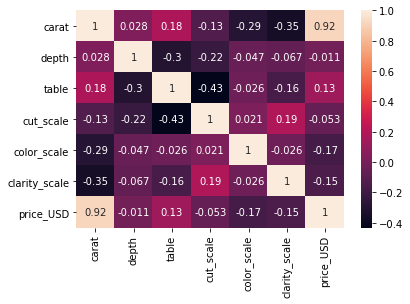

In [20]:
sns.heatmap(dataset.corr(),annot=True) #This is EDA